In [ ]:
!wget  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip

--2024-12-16 08:36:10--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104177081 (1.0G) [application/zip]
Saving to: ‘TrainIJCNN2013.zip’

TrainIJCNN2013.zip  100%[===================>]   1.03G  10.4MB/s    in 83s     

2024-12-16 08:37:33 (12.7 MB/s) - ‘TrainIJCNN2013.zip’ saved [1104177081/1104177081]



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2 as cv
import pathlib
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
!unzip TrainIJCNN2013.zip -d ./TrainIJCNN2013

data_dir = pathlib.Path('./TrainIJCNN2013')

Archive:  TrainIJCNN2013.zip
   creating: ./TrainIJCNN2013/TrainIJCNN2013/
   creating: ./TrainIJCNN2013/TrainIJCNN2013/00/
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00000.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00001.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00002.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00003.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00004.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00005.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00006.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00007.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00008.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00009.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00010.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00011.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00012.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00013.ppm  
  inflating: ./TrainIJCNN2013/TrainIJCNN2013/00014.ppm  
  inflating: ./TrainI

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 800, 1360, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 800, 1360, 3)        │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(1, 800, 1360, 3)


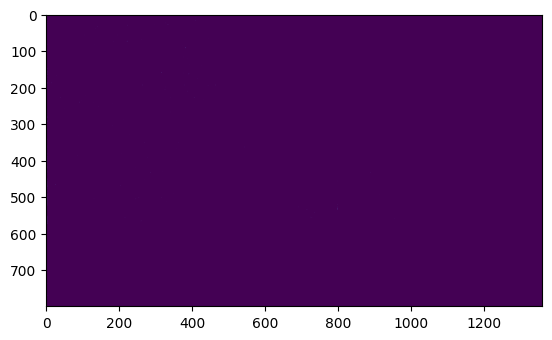

In [ ]:
img=cv.imread("./TrainIJCNN2013/TrainIJCNN2013/00013.ppm",1)


model = Sequential([
  layers.Conv2D(32, 3, padding='same',input_shape=(img.shape[0], img.shape[1], 3), activation='relu'),
  layers.Conv2D(3, 3, padding='same', activation='relu')

])


model.summary()

image=np.reshape(img, (1,img.shape[0], img.shape[1], 3))

result=model.predict(image)

print(result.shape)
res=result[0,:,:,2]

plt.imshow(res)


##CNN

In [ ]:

# Configuration du prétraitement des images
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

data_path = "/content/TrainIJCNN2013/TrainIJCNN2013"

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Obtenir les indices des classes
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Inverser le dictionnaire

# Mapping avec ClassID
ClassID = {
    0: 'speed limit 20 (prohibitory)',
    1: 'speed limit 30 (prohibitory)',
    2: 'speed limit 50 (prohibitory)',
    3: 'speed limit 60 (prohibitory)',
    4: 'speed limit 70 (prohibitory)',
    5: 'speed limit 80 (prohibitory)',
    6: 'restriction ends 80 (other)',
    7: 'speed limit 100 (prohibitory)',
    8: 'speed limit 120 (prohibitory)',
    9: 'no overtaking (prohibitory)',
    10: 'no overtaking (trucks) (prohibitory)',
    11: 'priority at next intersection (danger)',
    12: 'priority road (other)',
    13: 'give way (other)',
    14: 'stop (other)',
    15: 'no traffic both ways (prohibitory)',
    16: 'no trucks (prohibitory)',
    17: 'no entry (other)',
    18: 'danger (danger)',
    19: 'bend left (danger)',
    20: 'bend right (danger)',
    21: 'bend (danger)',
    22: 'uneven road (danger)',
    23: 'slippery road (danger)',
    24: 'road narrows (danger)',
    25: 'construction (danger)',
    26: 'traffic signal (danger)',
    27: 'pedestrian crossing (danger)',
    28: 'school crossing (danger)',
    29: 'cycles crossing (danger)',
    30: 'snow (danger)',
    31: 'animals (danger)',
    32: 'restriction ends (other)',
    33: 'go right (mandatory)',
    34: 'go left (mandatory)',
    35: 'go straight (mandatory)',
    36: 'go right or straight (mandatory)',
    37: 'go left or straight (mandatory)',
    38: 'keep right (mandatory)',
    39: 'keep left (mandatory)',
    40: 'roundabout (mandatory)',
    41: 'restriction ends (overtaking) (other)',
    42: 'restriction ends (overtaking (trucks)) (other)',
    43: 'background'
}

# Vérifier la correspondance entre `class_indices` et `ClassID`
mapped_classes = {v: ClassID[int(k)] for k, v in class_indices.items()}

print("Correspondance entre les indices des classes et les noms des classes :")
print(mapped_classes)

Found 702 images belonging to 43 classes.
Found 151 images belonging to 43 classes.
Correspondance entre les indices des classes et les noms des classes :
{0: 'speed limit 20 (prohibitory)', 1: 'speed limit 30 (prohibitory)', 2: 'speed limit 50 (prohibitory)', 3: 'speed limit 60 (prohibitory)', 4: 'speed limit 70 (prohibitory)', 5: 'speed limit 80 (prohibitory)', 6: 'restriction ends 80 (other)', 7: 'speed limit 100 (prohibitory)', 8: 'speed limit 120 (prohibitory)', 9: 'no overtaking (prohibitory)', 10: 'no overtaking (trucks) (prohibitory)', 11: 'priority at next intersection (danger)', 12: 'priority road (other)', 13: 'give way (other)', 14: 'stop (other)', 15: 'no traffic both ways (prohibitory)', 16: 'no trucks (prohibitory)', 17: 'no entry (other)', 18: 'danger (danger)', 19: 'bend left (danger)', 20: 'bend right (danger)', 21: 'bend (danger)', 22: 'uneven road (danger)', 23: 'slippery road (danger)', 24: 'road narrows (danger)', 25: 'construction (danger)', 26: 'traffic signal (

In [ ]:


# Fonction pour créer le modèle CNN
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialisation du modèle et entraînement
input_shape = (64, 64, 3)
num_classes = train_generator.num_classes
model = create_cnn_model(input_shape, num_classes)

# Entraîner le modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

# Sauvegarder le modèle
model.save('my_model.keras')
print("Modèle entraîné et sauvegardé.")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.1115 - loss: 3.6357 - val_accuracy: 0.2318 - val_loss: 2.9759
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3130 - loss: 2.8289 - val_accuracy: 0.4702 - val_loss: 2.0689
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5350 - loss: 1.8091 - val_accuracy: 0.6424 - val_loss: 1.4325
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6994 - loss: 1.1028 - val_accuracy: 0.6887 - val_loss: 1.1438
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7980 - loss: 0.7494 - val_accuracy: 0.7550 - val_loss: 0.9095
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8788 - loss: 0.4879 - val_accuracy: 0.7682 - val_loss: 0.7561
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9347 - loss: 0.2468 - val_accuracy: 0.8079 - val_loss: 0.6824
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9680 - loss: 0.1246 - val_accuracy: 0.8146 - val_loss: 

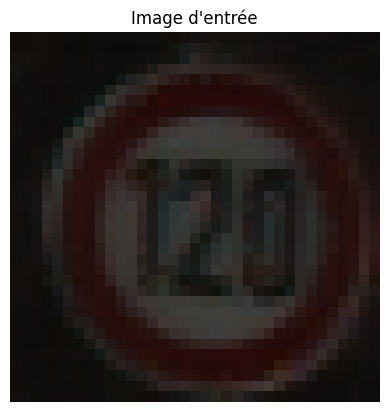

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Classe prédite : 8, Confiance : 99.93%


In [ ]:


# Fonction pour charger et afficher une image
def load_and_show_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Image d'entrée")
    plt.axis("off")
    plt.show()
    return image_rgb

# Fonction pour prétraiter une image
def preprocess_image(image):
    image_resized = cv2.resize(image, (64, 64))
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)
    return image_input

# Fonction pour prédire la classe d'une image
def predict_image(model, image_input):
    predictions = model.predict(image_input)
    class_index = np.argmax(predictions)
    confidence = predictions[0][class_index] * 100
    print(f"Classe prédite : {class_index}, Confiance : {confidence:.2f}%")
    return class_index

# Chemin de l'image et prédiction
image_path = "/content/TrainIJCNN2013/TrainIJCNN2013/08/00005.ppm"
image = load_and_show_image(image_path)
image_input = preprocess_image(image)

# Charger le modèle et effectuer une prédiction
try:
    model = tf.keras.models.load_model("my_model.keras")
    predict_image(model, image_input)
except Exception as e:
    print(f"Erreur : {e}. Assurez-vous que le modèle est correctement chargé.")